<h1><center> Random Forest Classification </center></h1>

LinkedIn Learning: https://www.linkedin.com/learning/nlp-with-python-for-machine-learning-essential-training/introducing-random-forest?u=78163626<br>
https://www.datacamp.com/community/tutorials/random-forests-classifier-python

## *Written by Nathanael Hitch*

<span style="color:OrangeRed">For background in classification - 'NLP_Logisitic-Regression.ipynb'</span>

<hr>

<span style="background-color:DeepPink; color:white; font-size:20px">Appends Added:</span>

1. An example of a multiple class dataset
2. Using grid search

<hr>

### Before - Ensemble Method

**Ensemble method** is a technique that "creates multiple models and combines them to produce better results than any single model"/<br>
This helps the model to depend on aggregated opinions of many models rather than the individual opinion of one model.

# What is it?

**Randon Forest** is an "Ensemble learning method that constructs a collection of decision trees and then aggregates the predictions of each tree to determine the final prediction".<br>
The individual decision trees are the 'weak models' that are combined into the aggreagated Forest model.

In a binary classification (positive or negative), each individually built decision tree will give a result of positive or negative with the aggregated result being the classification with the most results (positive = 60, negative = 40, positive is the aggregate result).<br>
Simply put, it's a simple voting method for the trees.

## Benefits

- Considered highly accurate and robust due to the number of decision trees in the process.
- Can be used for classification (categorical) or regression (continous).
- Easily handles outliers, missing values (median values or weighted averages), scewed data or data that's not on the same scale.
- Accepts various types of inputs (continous, ordinal/statistical, etc.).
- Less likely to Overfit as the average of the decision trees cancels out the biases.
- Outputs feature importance.

Useful as data cleaning isn't necessarily needed as it accepts anything.

<span style="color:white; background-color:DarkBlue">As it can be used in regression, as well as classification, it can handle multiple class data sets.</span>

## Disadvantages

- Slow to generate results due to multiple decision trees.
- Model difficult to interpret compared to a decision tree.

# Example

## Set Up

This starts very similar to Logistic Regression:

- read in file
- tokeniser and clean the data<br>
In this case, tokenise, remove stop words and punctuation and lemmatise.<br>
- create vectoriser: Count or Tfidf

In [27]:
                        # Importing needed packages

import spacy
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import string

#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

                        # Reading .csv file

#df = pd.read_csv("Files/SMSSpamCollection.tsv", sep='\t')

df = pd.read_csv("Files/SMS_test.tsv", sep='\t')
# Smaller testing file

df.columns = ['label','body_test']
# File doesn't have column headers - now they have names assigned to their columns

#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

                        # Creating custom tokeniser and cleaning function

def spacy_cleaner(sentence):
    
    nlp = spacy.load("en_core_web_sm")
    punctuations = string.punctuation
    
    #print("Input sentence:\n", sentence,"\n")
    
    doc = nlp(sentence.strip())
    # Pass text into model's pipeline.
    
    myTokens = [token for token in doc]
    # Creating a list of the words in the sentence.
    #print("Sentence tokenised:\n", myTokens,"\n")
    
    myTokens = [token for token in myTokens if token.is_stop == False and token.text not in punctuations]
    # List of words without stopwords or punctuations.
    #print("Sentence without stopwords or punctuations:\n", myTokens, "\n")
    
    myTokens = [token.lemma_.strip().lower() if token.pos_ != "PROPN" else token.lemma_.strip() \
                for token in myTokens]
    # Words are lemmatised, spaces at end removed and (if not a proper noun) lowercased.
    
    myTokens = [token for token in myTokens if token != ""]
    
    #print("Sentence lemmatisted, no spaces and lowercase (except Proper Noun):\n", myTokens, "\n")
    
    return myTokens

#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

                        # Creating Vectoriser

bow_vector = CountVectorizer(tokenizer = spacy_cleaner, ngram_range=(1,1))

#tfidf_vector = TfidfVectorizer(tokenizer = spacy_cleaner)

True


## Using the Random Forest Classifier

Next we need to create the Random Forest object; to see the list of all the attributes and methods for the Random Forest Classifier, use *dir(RandomForestClassifier)*.<br>
By printing *RandomForestClassifier()* it will also show all the hyper-primaries plus their default settings.

This object has n_jobs = -1 as it'll allow the decision trees to be made independent of one another, in parallel, so that they can be made faster.

In [2]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=-1, n_estimators=4)
# n_jobs allows the decision trees to be made in parallel
    # The model is trained and tested more quickly.

print(dir(rfc),"\n")
# Lists the classes Attributes and Methods

print(rfc)
# Shows the Hyper-primaries and their default values

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_estimator_type', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_required_parameters', '_set_oob_score', '_validate_X_predict', '_validate_estimator', '_validate_y_class_weight', 'apply', 'base_estimator', 'bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'decision_path', 'estimator_params', 'feature_importances_', 'fit', 'get_params', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_est

Amongst a lot of hyper-primaries, *I will not be going through every one*, there is **n_estimators**. This is the number of decision trees that will be buld within the model; at the moment there will be '10' trees built with unlimited steps. There will then be a vote amongst the trees to make the final decision.

Also of significance is **max_depth** which is "*how deep each of the decision trees is*". It's default is 'None' which means that the model build each decision tree until it minimises some loss criteria.<br>
<span style="background-color:red; color:white">I'll be honest, I'm not completely sure what this means.</span>

*As a note*, Random Forest is built on relatively few fully built decision trees; this will become apparent later on.

## Training and Testing

### Standard

One way is to split the data into training and testing groups and train and test the model that way.

<span style="background-color:red; color:white">NOTE:</span>
`For this way, the data has been reduced and the number of decision trees has been lessened, otherwise it takes the computer a long time to process the information.`

In [3]:
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import train_test_split

#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

                        # Splitting the test and training
    
X = df['body_test']
Y = df['label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

                        # Building the model

pipe = Pipeline([('vectorizer', bow_vector)
                 ,('classifier', rfc)])

pipe.fit(X_train, Y_train)

#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

                        # Evaluating the model

predicted = pipe.predict(X_test)

# Evaluation
print("Random Forest Accuracy:\n",metrics.accuracy_score(Y_test, predicted),"\n") # Accuracy
print("Random Forest Precision:\n",metrics.precision_score(Y_test, predicted, average='macro'),"\n") # Precision
print("Random Forest Recall:\n",metrics.recall_score(Y_test, predicted, average='macro'),"\n") # Recall
print("Random Forest F1 Score:\n",metrics.f1_score(Y_test, predicted, average='macro')) # F1 Score

Random Forest Accuracy:
 0.9066666666666666 

Random Forest Precision:
 0.9507042253521127 

Random Forest Recall:
 0.6818181818181819 

Random Forest F1 Score:
 0.7407407407407407


## K-Fold

<center><span style="background-color:red; color:white; font-size:30px">DO NOT RUN BELOW: this way is very slow, taking at least half an hour to process!!</span></center>

`In order for this to work, we need to use the full data set not the reduced set.`

Firstly, the testing text (df['body_test']) needs to be transformed and input into the vectoriser (Bag-of-Words or TF-IDF) so that it can be input into the Cross Validation Score object.

In [21]:
X_transform = bow_vector.fit_transform(df['body_test'])

<center><span style="background-color:chartreuse">This way does work but, as show by the big red signs, it is terribly slow! This is due to the data being uploaded to the spaCy model, which slows everything down. The LinkedIn example (shown later) has a better way which we will use later.</span></center>

<center><span style="background-color:red; color:white; font-size:30px">DO NOT RUN ABOVE: this way is very slow, taking at least half an hour to process!!</span></center>

`The Random Forest classifier will be generated again for this part.`<br>
With the Random Forest classifier, the K-Fold object will be generated next with the amount of folds, *K*, stated.

Lastly, generate the 'Cross Validation Score' object to put all the components together to return a score. The cross_val_score object needs to know:

- The model we're using = generate new one for this part
- Input features = **X_features**
- The label, i.e. the answer of the text = **df['label']** or **Y**
- How we're splitting the data (cv) = **k_fold**
- What scoring metric we use (scoring) =  in this case **accuracy**, another metric can be chosen
- Best to put **n_jobs = -1** as each can be run independent of one another

The output will be an array of showing the accuracy for each iteration of the model. In this case, **5** results should be returned.

In [22]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=-1)

k_fold = KFold(n_splits=5)
# 5 splits

cross_val_score(estimator=rfc, X=X_transform, y=df['label'], cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.9       , 0.9       , 0.93      , 0.87      , 0.92929293])

# LinkedIn Example = much quicker

As mentioned, the text_cleaner intially developed, before showing the LinkedIn example, uses a spaCy model. These have their advantages as they return tokenised objects which have methods that can be used directly, e.g. Lemmatisation (*lemma_*) or Stop Words (*is_stop*). On the other hand, NLTK returns string objects that have been affected by NLTK classes, like a Lemmatiser.<br>
**However**, the spaCy model can slow down the model as the model is applied to each string that comes from the file.

The LinkedIn example will be quickly shown and then a basic code has been written below as not all of the stuff in the LinkedIn example is necessary for the K-Fold analysis.

<hr>
<center><span style="color:white; background-color: blue; font-size:20px">Refresher on Lambdas</span></center>

https://www.w3schools.com/python/python_lambda.asp

"*A lambda function is a small anonymous function; it can take any number of arguments, but can only have one expression.*"

For example:

In [14]:
x = lambda a : a + 10

print("Just a:",x(5),"\n")

x = lambda a, b : a * b

print("a and b:",x(5,6))

Just a: 15 

a and b: 30


Lambda is better shown when you use them as an anonymous function inside another function:

In [10]:
def myfunc(n):
    
    return lambda a : a * n

You can use that function in many different ways, even using the same function to make 2 different functions in the same programme:

In [13]:
print("Original Input: 10\n")

myDoubler = myfunc(2)

print("Double Function:", myDoubler(10), "\n")

myTripler = myfunc(3)

print("Triple Function:", myTripler(10))

Original Input: 10

Double Function: 20 

Triple Function: 30


<hr>

Below is how the **LinkedIn Learning** example used the for transforming the 'body_test' data, and then Cross Validation.

In [4]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')

ps = nltk.PorterStemmer()
# Removes affixes from words - dies -> die - flies -> fli
    # Similar to spacy's lemmatiser but ma not return actual words (as above)

data = pd.read_csv("Files/SMSSpamCollection.tsv", sep='\t')
# Reading the file

data.columns = ['label', 'body_text']
# Labeling the columns


# Not sure this is necessary for the model
def count_punct(text):

    count = sum([1 for char in text if char in string.punctuation])
    # Calculates the number of punctuation symbols in the text
    
    return round(count/(len(text) - text.count(" ")), 3)*100
    # Returns a percentage of the text that is punctucation symbols (excluding spaces)
    

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
# Number of characters in the text without the spaces

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
# Using the 'count_punct' function on the text

def clean_text(text):
    
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    # Removing any punctuation characters
        # The use of 'word' is a bit misleading
    
    tokens = re.split('\W+', text)
    # Splitting the words using regex
    
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    # Using 'Porter Stemmer' to remove word affixes
        # Not quite as good as Lemmatisation
    
    return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

X_features = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=-1)

k_fold = KFold(n_splits=5)
# 5 splits

cross_val_score(estimator=rfc, X=X_features, y=data['label'], cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.97935368, 0.97935368, 0.97843666, 0.96585804, 0.97484277])

The X_features has a couple of bits of extra information that isn't needed for the K-Fold analysis of a Random Forest classifier.

### Simplified Example

Below is a simpler cleaning function, compared to the LinkedIn example, but is quicker (MUCH quicker) compared to the first code.<br>
The code is split up to make things easier; firstly the set up similar to other classifiers:

In [12]:
import spacy
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import string
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import nltk
from sklearn.pipeline import Pipeline

import winsound

#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

                        # Reading .csv file

df = pd.read_csv("Files/SMSSpamCollection.tsv", sep='\t')

df.columns = ['label','body_test']
# File doesn't have column headers - now they have names assigned to their columns

#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

                        # Creating custom tokeniser and cleaning function

Lemmatiser = nltk.stem.WordNetLemmatizer()
# Instantiating the NLTK Lemmatiser

punctuations = string.punctuation
# Putting punctuation symbols into an object

nlp = spacy.load("en_core_web_sm")
# Import spacy model

stopwords = spacy.lang.en.stop_words.STOP_WORDS
# A list of stopwords that can be filtered out
    # NLTK also has a stop words object but it has fewer words

def text_cleaner(sentence):    
                
    sentence = "".join([char for char in sentence.strip() if char not in punctuations])
    # Getting rid of any punctuation characters
    
    myTokens = re.split('\W+', sentence)
    # Tokenising the words
    
    myTokens = [token.lower() for token in myTokens if token not in stopwords]
    # Removing stop words
    
    myTokens = [Lemmatiser.lemmatize(token) for token in myTokens]
    # Lemmatising the words and putting in lower case except for proper nouns
    
    return myTokens    

#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

                        # Creating Vectoriser

bow_vector = CountVectorizer(tokenizer = text_cleaner, ngram_range=(1,1))

#tfidf_vector = TfidfVectorizer(tokenizer = text_cleaner)

,0,1,2,3,4,5,6,7,8,9,...,8796,8797,8798,8799,8800,8801,8802,8803,8804,8805
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Using the LinkedIn code, we can show the results of the vectoriser. However, this is not necessary when developing the actual code.

In [ ]:
#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

                        # Transforming the data

X_bow = bow_vector.fit_transform(df['body_test'])

X_transform = pd.concat([pd.DataFrame(X_bow.toarray())], axis=1)

winsound.PlaySound("Files/Alarm07.wav", winsound.SND_FILENAME)

X_transform.head()

The standard way (for myself anyway) is to use the Pipeline to vectorise and classify the data:

In [15]:
#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

                        # Evaluating the model
    
rfc = RandomForestClassifier(n_jobs=-1)

pipe = Pipeline([('vectorizer', bow_vector)
                 ,('classifier', rfc)])

k_fold = KFold(n_splits=5)
# 5 splits

print(cross_val_score(estimator=pipe, X=df['body_test'], y=df['label'], cv=k_fold, scoring='accuracy', n_jobs=-1))

winsound.PlaySound("Files/Alarm07.wav", winsound.SND_FILENAME)

[0.97935368 0.97576302 0.97484277 0.95867026 0.96585804]


You could also use the vectorisation transformation so that the vectoriser isn't needed as it's already been used.<br>
Either way, the same result is attained:

In [9]:
#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

                        # Evaluating the model
    
rfc = RandomForestClassifier(n_jobs=-1)

k_fold = KFold(n_splits=5)
# 5 splits

print(cross_val_score(estimator=rfc, X=X_bow, y=df['label'], cv=k_fold, scoring='accuracy', n_jobs=-1))

winsound.PlaySound("Files/Alarm07.wav", winsound.SND_FILENAME)

With X_bow:
 [0.97845601 0.97666068 0.97663971 0.9640611  0.96495957]


<h1><center>APPEND 1</center></h1>

# An example of a multiple class dataset

https://www.datacamp.com/community/tutorials/random-forests-classifier-python

Using the Iris Flower dataset, <span style="color:red">dataset not csv file</span>, built into the sklearn module we can show a more complex use of Random Forest.<br>
The model will classify the data for each flower into one of three classes: setosa, vericolor and virginia. However, the dataset will use four different columns of data to make the classification.

It's pretty simple.

In [34]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
iris = datasets.load_iris()

# print the label species(setosa, versicolor, virginica)
print("Flower classes: ", iris.target_names,"\n")

# print the names of the four features
print("Flower data columns: ", iris.feature_names, "\n")

Flower classes:  ['setosa' 'versicolor' 'virginica'] 

Flower data columns:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 



We need to seperate the dependent (features) and independent (labels) variables out.

As we're using a dataset, we first need to convert it to a dataframe to use. As we will be using one training model, we will then use the train_test_split function.

In [22]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Creating a DataFrame of given iris dataset.
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})

X = data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y = data['species']  # Labels

# For a csv file, X and y can be done the same way

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

Then .fit() the model to the training data:

In [23]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=10, n_jobs=-1)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

And see what the accuracy of the model is:

In [24]:
from sklearn import metrics

y_pred=clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


You can **find** and **visualise** important features of the daat using sklearn:

In [29]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)

feature_imp

petal width (cm)     0.461067
petal length (cm)    0.427307
sepal length (cm)    0.087476
sepal width (cm)     0.024150
dtype: float64

No handles with labels found to put in legend.


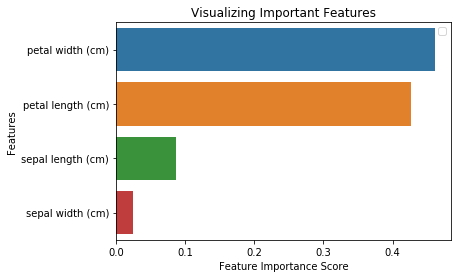

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

As shown by the numbers and the graph, the 'sepal width' is of low importance. This means it can be removed from the features, leaving 'X' with:

In [32]:
X = data[['petal length', 'petal width','sepal length']]  # Removed feature "sepal length"

<h1><center>APPEND 2</center></h1>

# Using grid search

Able to vary a set of hyper-variables, making a 'grid', to look at results between classifiers with varying hyper-variables to see what values for the hyper-variables give the best results for the model.

We will start with setting up the data and the function to clean the data as normal:

In [4]:
import spacy
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import nltk
from sklearn.pipeline import Pipeline

#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

                        # Reading .csv file

df = pd.read_csv("Files/SMSSpamCollection.tsv", sep='\t')

df.columns = ['label','body_test']
# File doesn't have column headers - now they have names assigned to their columns

X = df['body_test'] #.astype(str)

y_labels = df['label'] #.astype(str)

#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

                        # Creating custom tokeniser and cleaning function

Lemmatiser = nltk.stem.WordNetLemmatizer()
# Instantiating the NLTK Lemmatiser

punctuations = string.punctuation
# Putting punctuation symbols into an object

nlp = spacy.load("en_core_web_sm")
# Import spacy model

stopwords = spacy.lang.en.stop_words.STOP_WORDS
# A list of stopwords that can be filtered out
    # NLTK also has a stop words object but it has fewer words

def text_cleaner(sentence):    
                
    sentence = "".join([char for char in sentence.strip() if char not in punctuations])
    # Getting rid of any punctuation characters
    
    myTokens = re.split('\W+', sentence)
    # Tokenising the words
    
    myTokens = [token.lower() for token in myTokens if token not in stopwords]
    # Removing stop words
    
    myTokens = [Lemmatiser.lemmatize(token) for token in myTokens]
    # Lemmatising the words and putting in lower case except for proper nouns
    
    return myTokens

tfidf_vector = TfidfVectorizer(analyzer=text_cleaner)

For this grid, we will be varying the n_estimators (how many decision trees in each model, default = 10) and max_depth (how 'deep' each tree goes, default = none, i.e. no limit to the depth).

We next need to split the data between training and testing:

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_labels, test_size=0.3)

Next, we will write a function that will accept the estimators and model's depth:

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn import metrics
from sklearn.pipeline import Pipeline

def train_RF(n_est, depth):
    
    rfc = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    # Creating a classifier that will be created will specified hyper-variables
    
    pipe = Pipeline([('vectorizer', tfidf_vector)
                    ,('classifier', rfc)])
    
    pipe.fit(X_train, y_train)
    # Train that model
    
    predicted = pipe.predict(X_test)
    # Test that model
    
    precision, recall, fscore, support = score(y_test, predicted, pos_label = 'spam', average='binary')
    accuracy = metrics.accuracy_score(y_test, predicted)
    # Getting the metrics from that model
        # pos_label = what label is considered the positive one
        
    print('Est: {} / Depth: {} ----- Precision: {} / Recall: {} / Metrics_Accuracy: {} / Calculated_Accuracy: {}'.format(
        n_est, depth, round(precision, 3), round(recall, 3), round(accuracy, 3), round((predicted==y_test).sum() / len(predicted), 3)))
    # Print out metrics to compare each model
    
        # The Calculated Accuracy:
            # predicted==y_test pairs these 2 together, returning a boolean list of whether they're equal to eachother
            # The no. of correct predicted values divided by the number of values

Lastly, the code to show the grid functionality of the models.<br>
This will loop through different combinations of values for the variables to show the precision, recall, and accuracy values for each model as a comparison:

In [11]:
for n_est in[10, 50, 100]:
# Go through values 10, 50, 100 for estimators
    
    for depth in [10, 20, 30, None]:
    # Go through values 10, 20, 30, None for depth
        
        train_RF(n_est, depth)

Est: 10 / Depth: 10 ----- Precision: 1.0 / Recall: 0.178 / Metrics_Accuracy: 0.898 / Calculated_Accuracy: 0.898
Est: 10 / Depth: 20 ----- Precision: 1.0 / Recall: 0.529 / Metrics_Accuracy: 0.941 / Calculated_Accuracy: 0.941
Est: 10 / Depth: 30 ----- Precision: 1.0 / Recall: 0.673 / Metrics_Accuracy: 0.959 / Calculated_Accuracy: 0.959
Est: 10 / Depth: None ----- Precision: 0.98 / Recall: 0.716 / Metrics_Accuracy: 0.963 / Calculated_Accuracy: 0.963
Est: 50 / Depth: 10 ----- Precision: 1.0 / Recall: 0.279 / Metrics_Accuracy: 0.91 / Calculated_Accuracy: 0.91
Est: 50 / Depth: 20 ----- Precision: 1.0 / Recall: 0.587 / Metrics_Accuracy: 0.949 / Calculated_Accuracy: 0.949
Est: 50 / Depth: 30 ----- Precision: 1.0 / Recall: 0.673 / Metrics_Accuracy: 0.959 / Calculated_Accuracy: 0.959
Est: 50 / Depth: None ----- Precision: 0.994 / Recall: 0.769 / Metrics_Accuracy: 0.971 / Calculated_Accuracy: 0.971
Est: 100 / Depth: 10 ----- Precision: 1.0 / Recall: 0.231 / Metrics_Accuracy: 0.904 / Calculated_Ac

You can now compare the different values for each model:<br>
Estimators, while make a small difference, don't make as big a difference as the depth of the model. Models with limited max_depths can be eliminated as they have low metric scores; it's probably best for the model to have no limit.

This exercise is very broad: probably be expected to explore a wider range of hyper-variables and a wider range of their values.